In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py

# For splitting the dataset to training and validation tests

batch_size = 16
epochs = 20

# X training
f = h5py.File("./../X_training.h5","r")
train_images = f['training'][:]
f.close()
train_images[np.isnan(train_images)] = 0.

# Y training
f = h5py.File("./../Y_training.h5","r")
train_labels = f['train_labels'][:].astype(int)
f.close()
train_labels = train_labels.flatten()

# X validation
f = h5py.File("./../X_validation.h5","r")
val_images = f['validation'][:]
f.close()
val_images[np.isnan(val_images)] = 0.

# Y validation
f = h5py.File("./../Y_validation.h5","r")
val_labels = f['val_labels'][:].astype(int)
f.close()
val_labels = val_labels.flatten()

# X testing
f = h5py.File("./../X_validation.h5","r")
test_images = f['validation'][:]
f.close()
test_images[np.isnan(test_images)] = 0.

# Y testing
f = h5py.File("./../Y_validation.h5","r")
test_labels = f['val_labels'][:].astype(int)
f.close()
test_labels = test_labels.flatten()


class_names = ['Rest', 'MI Left Fist', 'MI Right Fist', 'MI Both Fists', 'MI Both Feet']

In [2]:
# X testing
f = h5py.File("./../X_validation.h5","r")
test_images = f['validation'][:]
f.close()
test_images[np.isnan(test_images)] = 0.

# Y testing
f = h5py.File("./../Y_validation.h5","r")
test_labels = f['val_labels'][:].astype(int)
f.close()
test_labels = test_labels.flatten()

In [3]:
a = np.zeros(50)

a[0:10] = 0
a[10:20] = 1
a[20:30] = 2
a[30:40] = 3
a[40:50] = 4

print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4.]


In [4]:
import numpy as np
class_0_ind = np.argwhere(test_labels == 0)

print(class_0_ind.shape)

class_1_ind = np.argwhere(test_labels == 1)

print(class_1_ind.shape)

class_2_ind = np.argwhere(test_labels == 2)

print(class_2_ind.shape)

class_3_ind = np.argwhere(test_labels == 3)

print(class_3_ind.shape)

class_4_ind = np.argwhere(test_labels == 4)

print(class_4_ind.shape)

(900, 1)
(230, 1)
(220, 1)
(210, 1)
(240, 1)


In [5]:
# Separate images and labels of Class 0
class_0_im = np.zeros((900,32,32,3))
class_0_lab = np.zeros((900,1))
n=0
for ind in class_0_ind:
    class_0_im[n] = test_images[ind]
    class_0_lab[n] = test_labels[ind]
    n=n+1

print("Done.")
print(class_0_im.shape)
print(class_0_lab.shape)

Done.
(900, 32, 32, 3)
(900, 1)


In [19]:
# Separate images and labels of Class 1
class_1_im = np.zeros((230,32,32,3))
class_1_lab = np.zeros((230,1))
n=0
for ind in class_1_ind:
    class_1_im[n] = test_images[ind]
    class_1_lab[n] = test_labels[ind]
    n=n+1

print("Done.")
print(class_1_im.shape)
print(class_1_lab.shape)

Done.
(230, 32, 32, 3)
(230, 1)


In [20]:
# Separate images and labels of Class 2
class_2_im = np.zeros((220,32,32,3))
class_2_lab = np.zeros((220,1))
n=0
for ind in class_2_ind:
    class_2_im[n] = test_images[ind]
    class_2_lab[n] = test_labels[ind]
    n=n+1

print("Done.")
print(class_2_im.shape)
print(class_2_lab.shape)

Done.
(220, 32, 32, 3)
(220, 1)


In [24]:
# Separate images and labels of Class 3
class_3_im = np.zeros((210,32,32,3))
class_3_lab = np.zeros((210,1))
n=0
for ind in class_3_ind:
    class_3_im[n] = test_images[ind]
    class_3_lab[n] = test_labels[ind]
    n=n+1

print("Done.")
print(class_3_im.shape)
print(class_3_lab.shape)

Done.
(210, 32, 32, 3)
(210, 1)


In [25]:
# Separate images and labels of Class 4
class_4_im = np.zeros((240,32,32,3))
class_4_lab = np.zeros((240,1))
n=0
for ind in class_4_ind:
    class_4_im[n] = test_images[ind]
    class_4_lab[n] = test_labels[ind]
    n=n+1

print("Done.")
print(class_4_im.shape)
print(class_4_lab.shape)

Done.
(240, 32, 32, 3)
(240, 1)


In [26]:
train_images_balanced = np.zeros((1050,32,32,3))
train_labels_balanced = np.zeros((1050,1))
n=0

# For images
for i in range(0,1050,50):
    train_images_balanced[i:i+10]    = class_0_im[n:n+10] # Class 0
    train_images_balanced[i+10:i+20] = class_1_im[n:n+10] # Class 1
    train_images_balanced[i+20:i+30] = class_2_im[n:n+10] # Class 2
    train_images_balanced[i+30:i+40] = class_3_im[n:n+10] # Class 3
    train_images_balanced[i+40:i+50] = class_4_im[n:n+10] # Class 4
    n = n+10

k=0
# For labels
for i in range(0,1050,50):
    train_labels_balanced[i:i+10]    = class_0_lab[k:k+10] # Class 0
    train_labels_balanced[i+10:i+20] = class_1_lab[k:k+10] # Class 1
    train_labels_balanced[i+20:i+30] = class_2_lab[k:k+10] # Class 2
    train_labels_balanced[i+30:i+40] = class_3_lab[k:k+10] # Class 3
    train_labels_balanced[i+40:i+50] = class_4_lab[k:k+10] # Class 4
    k = k+10
    

In [27]:
print(train_images_balanced.shape)
print(train_labels_balanced.shape)

(1050, 32, 32, 3)
(1050, 1)


In [28]:
print(train_labels_balanced[0:100])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]


In [29]:
# Balanced Dataset
f = h5py.File("X_validation_serial_balanced.h5","w")
training_dset = f.create_dataset('training_d', data = train_images_balanced, compression="gzip", compression_opts=0)

# Training downsampled labels
f = h5py.File("Y_validation_serial_balanced.h5","w")
traininglbs_dset = f.create_dataset('train_labels_d', data = train_labels_balanced, compression="gzip", compression_opts=0)

In [30]:
# Read labels and images
h5f = h5py.File('X_validation_serial_balanced.h5','r')
images = h5f['training_d'][:]
h5f.close()

h5f = h5py.File('Y_validation_serial_balanced.h5','r')
labels = h5f['train_labels_d'][:]
h5f.close()

print(images.shape)
print(labels.shape)

print(labels[0:100])

(1050, 32, 32, 3)
(1050, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]


In [2]:
print(train_images.shape)
print(train_labels.shape)

print(val_images.shape)
print(val_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(183600, 32, 32, 3)
(183600,)
(1800, 32, 32, 3)
(1800,)
(1800, 32, 32, 3)
(1800,)


In [57]:
print(train_images[0])
print(test_images[0])
print(val_images[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  .

In [58]:
print(train_labels)
print(test_labels)
print(val_labels)

[0. 0. 0. ... 3. 3. 3.]
[0. 0. 0. ... 3. 3. 3.]
[0. 0. 0. ... 4. 4. 4.]


In [59]:
# Reshape the input array
train_images2 = train_images.reshape((3600,1,32,32,3))
val_images2 = val_images.reshape((1800,1,32,32,3))
test_images2 = test_images.reshape((1800,1,32,32,3))

train_labels2 = train_labels[0::1]
val_labels2 = val_labels[0::1]
test_labels2 = test_labels[0::1]

#from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images2,train_labels2,random_state=82, test_size=1800)

In [60]:
print(train_images.shape)
print(test_labels.shape)

print(train_labels[0:20])
print(test_labels[0:20])

(1800, 1, 32, 32, 3)
(1800,)
[0. 1. 0. 0. 0. 1. 2. 0. 3. 0. 0. 4. 0. 0. 1. 2. 4. 0. 0. 3.]
[0. 2. 0. 3. 0. 3. 0. 0. 3. 0. 1. 2. 2. 4. 0. 3. 2. 1. 0. 0.]


In [61]:
# MODEL EFFORT 4: Time distributed Layers
from keras.layers import TimeDistributed

model = models.Sequential()

model.add(TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'), input_shape=(32, 32, 3)))
print(model.output_shape)
model.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
print(model.output_shape)
#model.add(TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')))
#print(model.output_shape)
model.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
print(model.output_shape)
model.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
print(model.output_shape)
model.add(TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
print(model.output_shape)
#model.add(TimeDistributed(layers.MaxPooling2D((2, 2))))
#print(model.output_shape)
#model.add(TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')))
#print(model.output_shape)
#model.add(TimeDistributed(layers.MaxPooling2D(2, 2)))
#print(model.output_shape)
#model.add(TimeDistributed(layers.Conv2D(256, (3, 3), activation='relu')))
#print(model.output_shape)

# FLatten Layer
#model.add(TimeDistributed(layers.ReLU()))
#print(model.output_shape)
#model.add(TimeDistributed(layers.MaxPooling2D(2, 2)))
#print(model.output_shape)
model.add(TimeDistributed(layers.Flatten()))
print(model.output_shape)

# LSTM Layer
model.add(layers.LSTM(128))
print(model.output_shape)
# Dense Layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
print(model.output_shape)
model.add(layers.Softmax())
print(model.output_shape)

(None, 1, 30, 30, 32)
(None, 1, 15, 15, 32)
(None, 1, 13, 13, 64)
(None, 1, 6, 6, 64)
(None, 1, 4, 4, 64)
(None, 1, 1024)
(None, 128)
(None, 5)
(None, 5)


In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_36 (TimeDis (None, 1, 30, 30, 32)     896       
_________________________________________________________________
time_distributed_37 (TimeDis (None, 1, 15, 15, 32)     0         
_________________________________________________________________
time_distributed_38 (TimeDis (None, 1, 13, 13, 64)     18496     
_________________________________________________________________
time_distributed_39 (TimeDis (None, 1, 6, 6, 64)       0         
_________________________________________________________________
time_distributed_40 (TimeDis (None, 1, 4, 4, 64)       36928     
_________________________________________________________________
time_distributed_41 (TimeDis (None, 1, 1024)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)              

In [63]:
from keras.optimizers import SGD
model.compile(optimizer=(SGD(lr=0.001)),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x=train_images2, y=train_labels2, batch_size=2, epochs=1, 
                    validation_data=(test_images2, test_labels2),shuffle=True)

1800/1800 [==============================] - 8s 4ms/step - loss: 1.6010 - accuracy: 0.4853 - val_loss: 1.5912 - val_accuracy: 0.5000


57/57 - 0s - loss: 1.5912 - accuracy: 0.5000
0.5


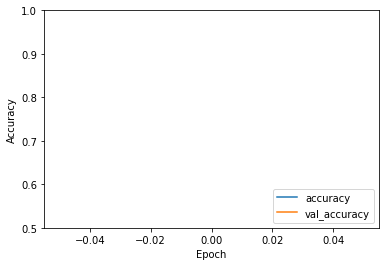

In [64]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Accuracy on validation data
val_loss, val_acc = model.evaluate(val_images2,  val_labels2, verbose=2)
print(val_acc)

In [65]:
# Accuracy on test data
test_loss, test_acc = model.evaluate(test_images2,  test_labels2, verbose=2)
print(test_acc)
print(test_loss)

57/57 - 0s - loss: 1.5912 - accuracy: 0.5000
0.5
1.5911566019058228


In [66]:
# Predict on the test images
predictions = model.predict(test_images2)

# Print our model's predictions.
a = np.argmax(predictions, axis=1)
print(a.shape)
print(np.unique(a))
#print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels)

(1800,)
[0]
[0. 2. 0. ... 0. 1. 0.]


In [10]:
# Save the model
model.save("model.h5")

In [11]:
loaded_model = models.load_model("model.h5")

AttributeError: 'str' object has no attribute 'decode'

In [18]:
# TFLite Section


tflite_model_name = 'MFCC'
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# Convert the model to the TensorFlow Lite format with quantization
quantize = True
if (quantize):
    def representative_dataset():
        for i in range(500):
            yield([train_images[i].reshape(1,32,32,3)])
    # Set the optimization flag.
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    # Enforce full-int8 quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.int8  # or tf.uint8
    converter.inference_output_type = tf.int8  # or tf.uint8
    # Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Alkinoos\AppData\Local\Temp\tmpvi70k58g\assets


8048

In [19]:
# This function here takes in the model and outputs a header file we will import into the TFLite example project folder. (/Core/Inc/)
# Function: Convert some hex value into an array for C programming

def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [20]:
c_model_name = 'MFCC'
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))

In [21]:
tflite_interpreter = tf.lite.Interpreter(model_path=tflite_model_name + '.tflite')
tflite_interpreter.allocate_tensors()
input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: conv2d_input
shape: [ 1 32 32  3]
type: <class 'numpy.int8'>

== Output details ==
name: Identity
shape: [1 5]
type: <class 'numpy.int8'>


In [22]:
# Performance of network

predictions = np.zeros((len(test_images),), dtype=int)
input_scale, input_zero_point = input_details[0]["quantization"]
for i in range(len(test_images)):
    val_batch = test_images[i]
    #We must convert the data into int8 format before invoking inference.
    val_batch = val_batch / input_scale + input_zero_point
    val_batch = np.expand_dims(val_batch, axis=0).astype(input_details[0]["dtype"])
    tflite_interpreter.set_tensor(input_details[0]['index'], val_batch)
    tflite_interpreter.allocate_tensors()
    tflite_interpreter.invoke()

    tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
    #print("Prediction results shape:", tflite_model_predictions.shape)
    output = tflite_interpreter.get_tensor(output_details[0]['index'])
    predictions[i] = output.argmax()

In [23]:
sum = 0
for i in range(len(predictions)):
    if (predictions[i] == test_labels[i]):
        sum = sum + 1
accuracy_score = sum / 100
print("Accuracy of quantized to int8 model is {}%".format(accuracy_score*100))
#print("Compared to float32 accuracy of {}%".format(score[1]*100))
#print("We have a change of {}%".format((accuracy_score-score[1])*100))

Accuracy of quantized to int8 model is 900.0%
